<a href="https://colab.research.google.com/github/Ullas2534/Projects/blob/main/Analyzing_Amazon_Sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


#  1: Extract - Load the dataset

In [ ]:
df=pd.read_csv("/content/Amazon Sales data.csv")


In [ ]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [ ]:
df.shape

(100, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [ ]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [ ]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

#2.Transform-Process the data
#Convert 'Order Date' to datetime

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract year and month from 'Order Date'
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Year-Month'] = df['Order Date'].dt.to_period('M')

#  3: Load - Prepare the data for analysis
# Group by Year, Month, and Year-Month for analysis

In [ ]:
monthly_sales = df.groupby(['Year', 'Month'])['Total Revenue'].sum().reset_index()
yearly_sales = df.groupby('Year')['Total Revenue'].sum().reset_index()
yearly_monthly_sales = df.groupby('Year-Month')['Total Revenue'].sum().reset_index()

#  4: Analysis - Visualize the sales trends

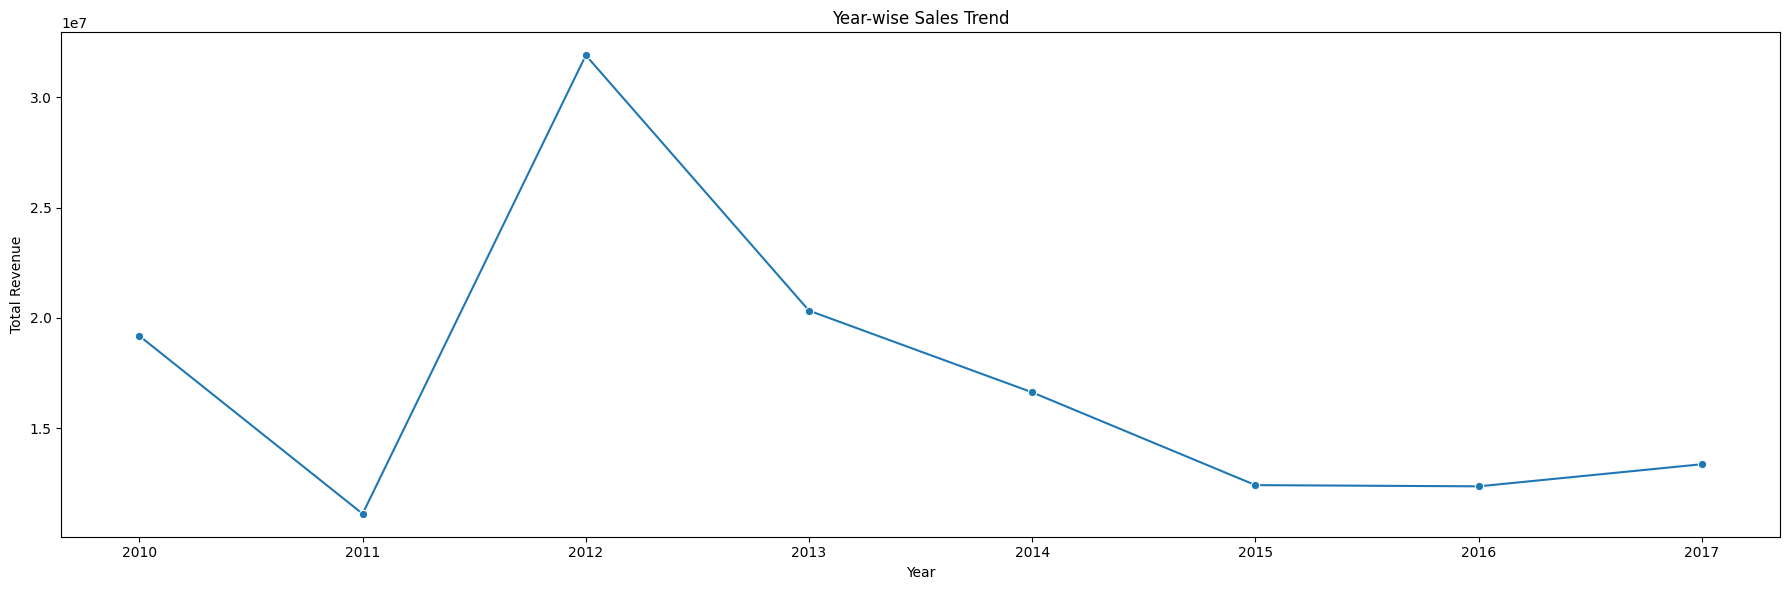

In [21]:
plt.figure(figsize=(18, 6))

# Year-wise Sales Trend
sns.lineplot(data=yearly_sales, x='Year', y='Total Revenue', marker='o')
plt.title('Year-wise Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()


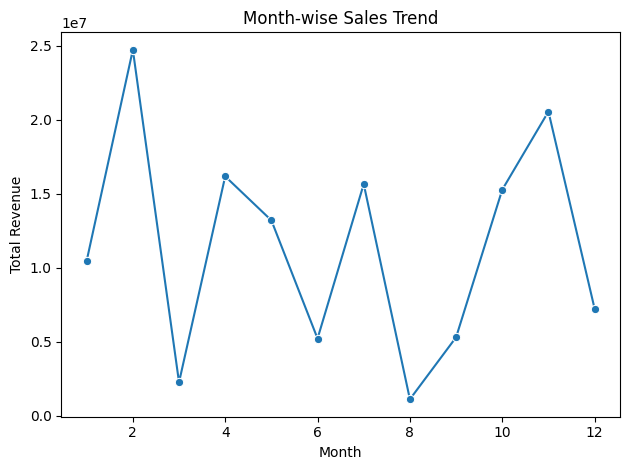

In [22]:
# Month-wise Sales Trend (Aggregated over all years)

monthly_sales_agg = df.groupby('Month')['Total Revenue'].sum().reset_index()
sns.lineplot(data=monthly_sales_agg, x='Month', y='Total Revenue', marker='o')
plt.title('Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

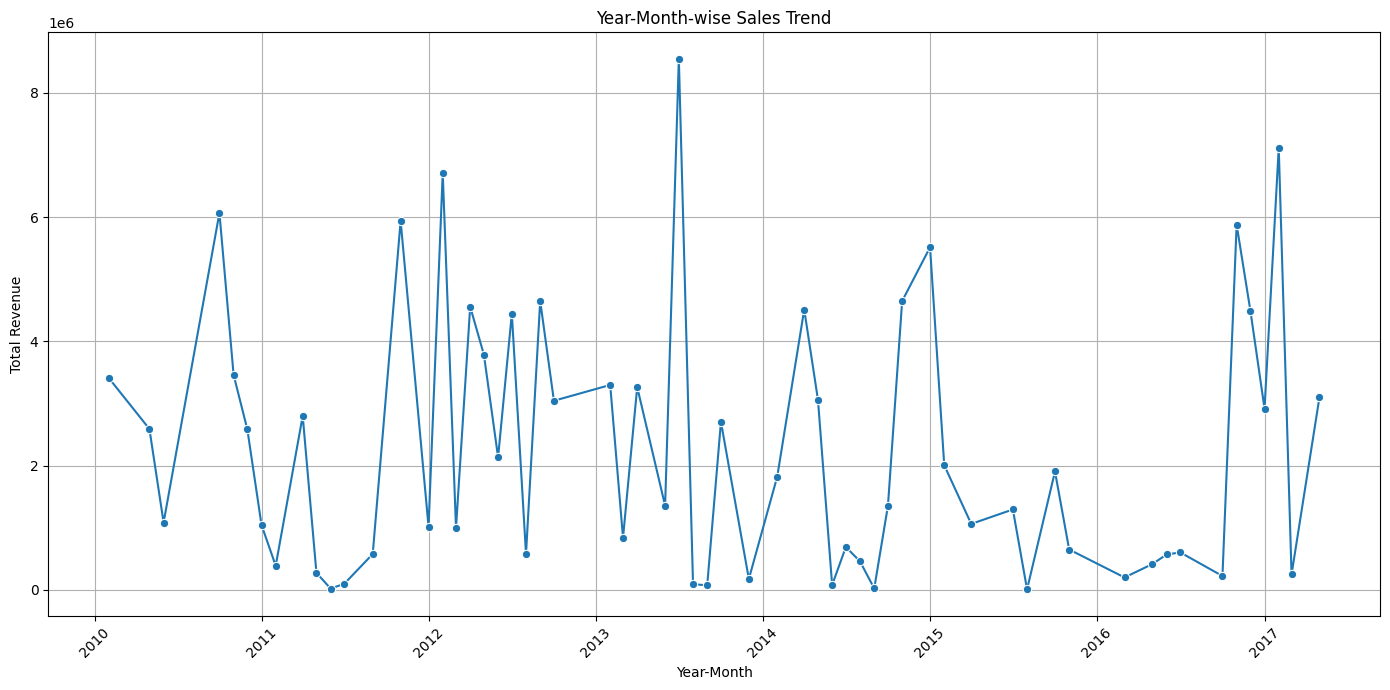

In [39]:
# Year-Month-wise Sales Trend
yearly_monthly_sales = df.groupby('Year-Month')['Total Revenue'].sum().reset_index()

# Convert 'Year-Month' to datetime for plotting
yearly_monthly_sales['Year-Month'] = yearly_monthly_sales['Year-Month'].dt.to_timestamp()

# Plot the year-month-wise sales trend
plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_monthly_sales, x='Year-Month', y='Total Revenue', marker='o')
plt.title('Year-Month-wise Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


#  5: Key Metrics and Factors

In [25]:
total_sales = df['Total Revenue'].sum()
total_profit = df['Total Profit'].sum()
average_order_value = df['Total Revenue'].mean()
average_units_sold = df['Units Sold'].mean()

print(f'Total Sales: ${total_sales:,.2f}')
print(f'Total Profit: ${total_profit:,.2f}')
print(f'Average Order Value: ${average_order_value:,.2f}')
print(f'Average Units Sold: {average_units_sold:,.2f}')

Total Sales: $137,348,768.31
Total Profit: $44,168,198.40
Average Order Value: $1,373,487.68
Average Units Sold: 5,128.71


#  6: Relationship Analysis

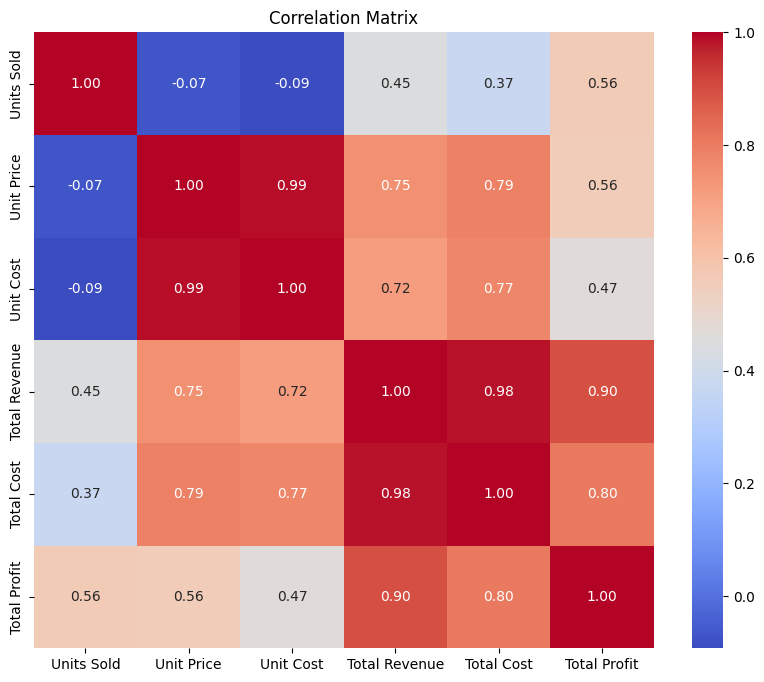

In [26]:
# Correlation matrix
correlation_matrix = df[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


<ipython-input-27-ccf45445a2ea>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Item Type', y='Profit Margin', palette='Spectral')


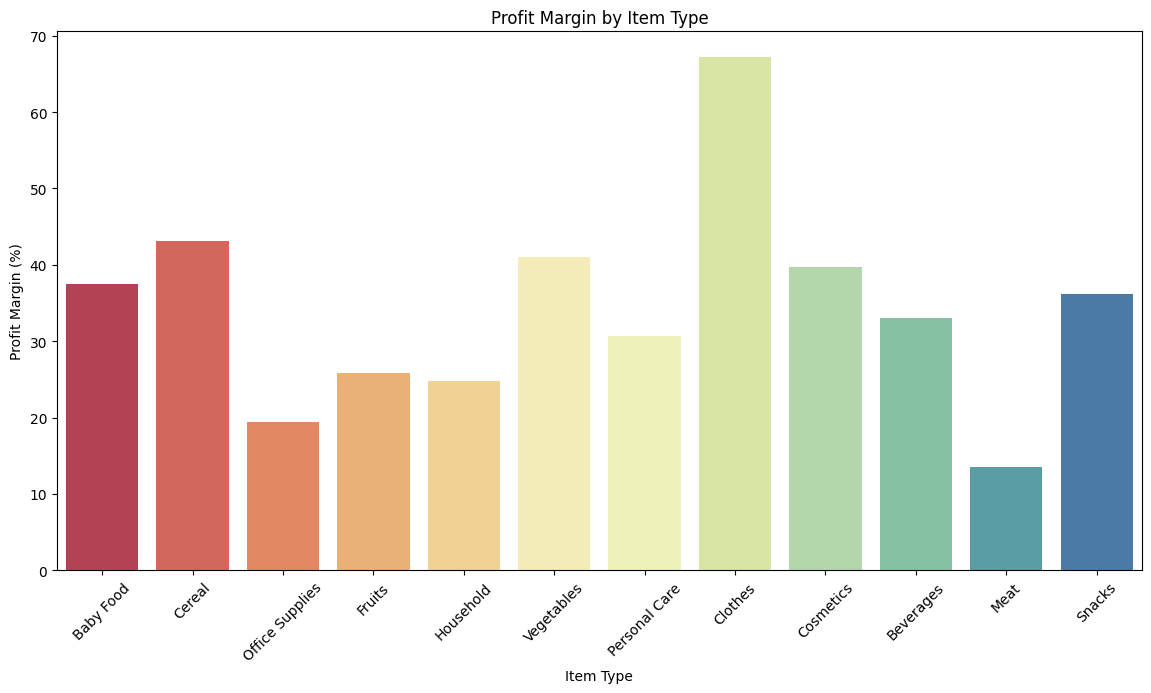

In [27]:
# Calculate Profit Margin
df['Profit Margin'] = (df['Total Profit'] / df['Total Revenue']) * 100

# Profit Margin by Item Type
plt.figure(figsize=(14, 7))
sns.barplot(data=df, x='Item Type', y='Profit Margin', palette='Spectral')
plt.title('Profit Margin by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.show()

<ipython-input-29-f49f6d8de87d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='Total Revenue', y='Country', palette='magma')


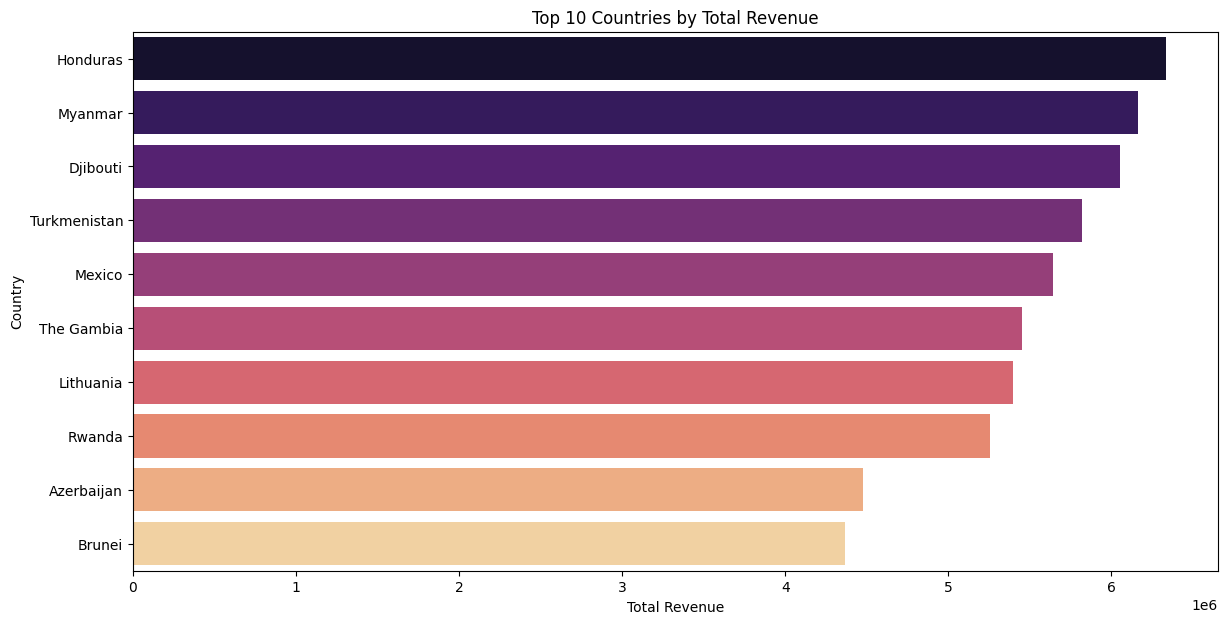

In [29]:
# Top 10 Countries by Total Revenue
top_countries = df.groupby('Country')['Total Revenue'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(data=top_countries, x='Total Revenue', y='Country', palette='magma')
plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.show()

<ipython-input-31-2c764f4fd6d4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_channel, x='Sales Channel', y='Total Revenue', palette='plasma')


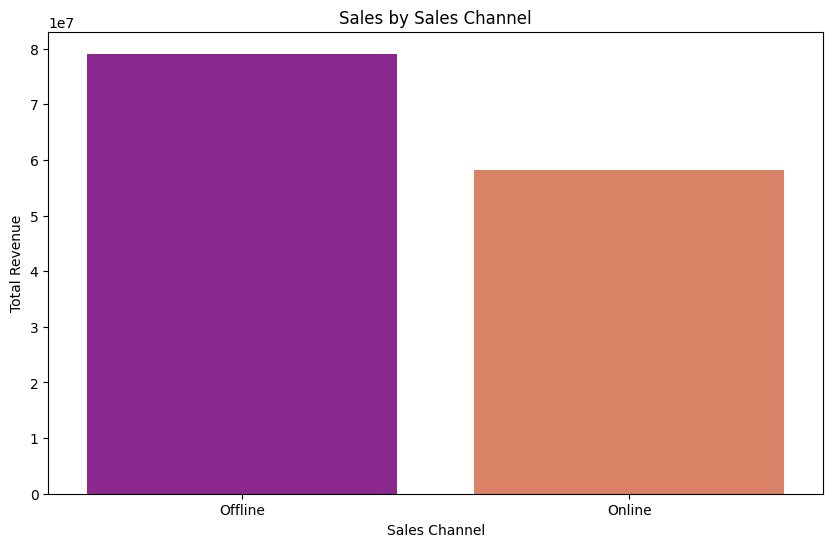

In [31]:
# Sales by Sales Channel
sales_by_channel = df.groupby('Sales Channel')['Total Revenue'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_channel, x='Sales Channel', y='Total Revenue', palette='plasma')
plt.title('Sales by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Total Revenue')
plt.show()